# imports

in this section we import and install all the needed libraries

In [1]:
!pip3 install gym
!pip3 install neat-python
!apt install xvfb ffmpeg xorg-dev libsdl2-dev swig cmake
!pip install gym[box2d]
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 352.9 kB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  gir1.2-ibus-1.0 libblkid-dev libdbus-1-dev libdecor-0-dev libdmx-dev libdmx1 libdrm-dev
  libegl-dev libegl1-mesa-dev libffi-dev libfontenc-dev libfontenc1 libfs-dev libfs6 libgbm-dev
  libgl-dev libgles-dev libgles1 libglib2.0-dev libglib2.0-dev-bin libglu1-mesa libglu1-mesa-dev
  libglvnd-core-dev libglvnd-dev libglx-dev libibus-1.0-5 libibus-1.0-dev libice-dev libmount-dev
  libopengl-dev libpciaccess-dev libpixman-1-dev libpulse-dev libpulse-mainloop-glib0
  libselinux1-dev libsepol-dev libsm-dev libsndio-dev libudev-dev libudev1 libwayland-bin
  libwayland-dev libxaw7-dev libxcomposite-dev libxcursor-dev libxcvt-dev libxcvt0 

In [2]:
import multiprocessing
import os
import pickle

import neat
import numpy as np
import gym
import matplotlib.pyplot as plt
import graphviz
import networkx as nx

#**NEAT**
to run the algorithm from google colab you need to upload the config file having the fileneme specified in the code.


### CartPole-v1,
in this section we solve CartPole with NEAT
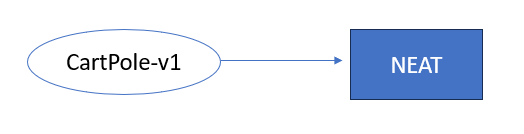


 ****** Running generation 0 ****** 

Population's average fitness: 15.74800 stdev: 20.15094
Best fitness: 171.00000 - size: (1, 4) - species 1 - id 152
Average adjusted fitness: 0.039
Mean genetic distance 1.862, standard deviation 0.506
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   136    171.0    0.060     0
     2    0   114     31.0    0.018     0
Total extinctions: 0
Generation time: 0.816 sec

 ****** Running generation 1 ****** 

Population's average fitness: 42.77200 stdev: 64.80432
Best fitness: 500.00000 - size: (1, 4) - species 1 - id 458
Average adjusted fitness: 0.067
Mean genetic distance 1.708, standard deviation 0.435
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   126    500.0    0.108     0
     2    1   124     93.0    0.026     0
Total extinctions: 0
Generation time: 0.929 sec (0.872 a

NetworkXError: ignored

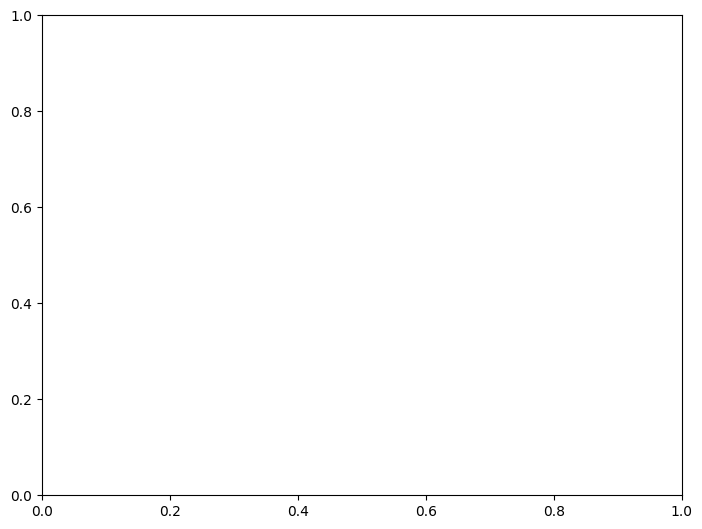

In [12]:
runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          observation = env.reset()
          total_reward = 0

          while True:
            action = net.activate(observation)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            observation, reward, done, _ = env.step(action)
            total_reward += reward

            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)
config_path = "config"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)


p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=250)

env = gym.make("CartPole-v1")
observation = env.reset()
winner_net= neat.nn.FeedForwardNetwork.create(winner, config)

#graph = nx.DiGraph()
#for node_id, node in enumerate(winner.nodes):
#    graph.add_node(node_id)

#for conn_key, conn in winner.connections.items():
#    if conn.enabled:
#        graph.add_edge(conn.key[0], conn.key[1], weight=conn.weight)




# Visualize the graph using networkx
#pos = nx.get_node_attributes(graph, 'pos')
#nx.draw(graph, with_labels=True, node_color="skyblue", node_size=800, font_size=8, font_color="black", font_weight="bold", linewidths=0.5, edge_color="gray", font_family="sans-serif")

fitness=0


while True:
  #env.render()
  action =net.activate(observation)
  action = 0 if action[0] < 0.5 else 1
  observation, reward, done, _ = env.step(action)

  fitness += reward
  screen = env.render(mode='rgb_array')
  if done:
        break

print("the fitness is", fitness)
print("the winner is", winner)

#graph = neat.graphviz.draw_net(winner, view=True, filename="neural_network")

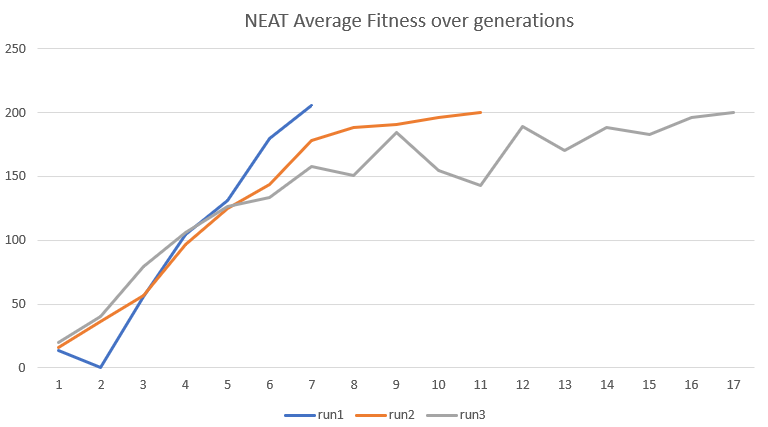

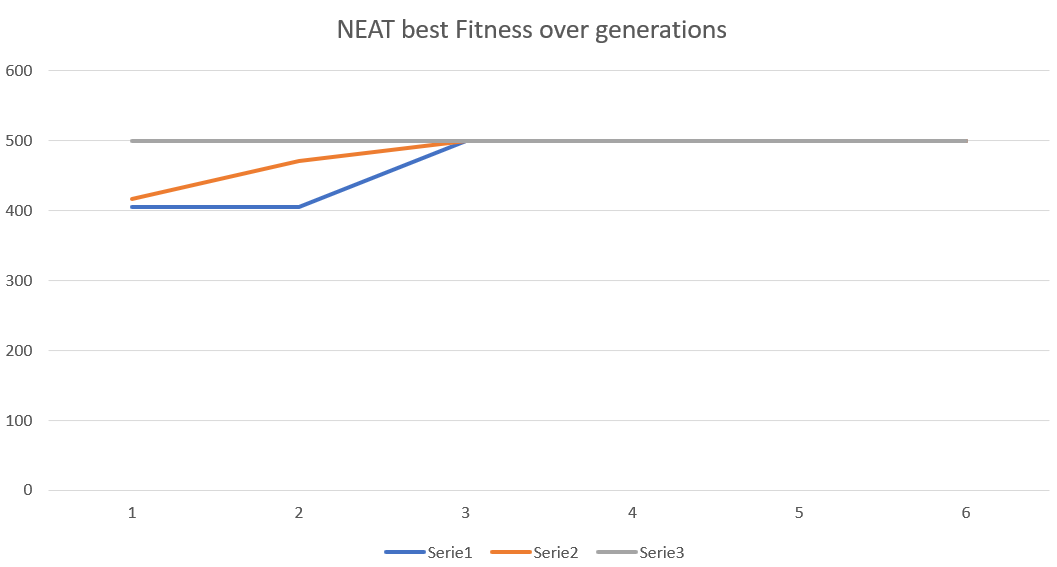

### BipedalWalker-v3,
in this section we solve BipedalWalker with NEAT

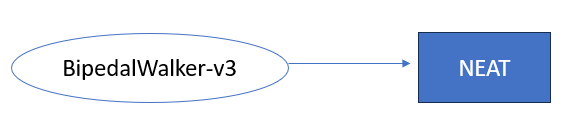

In [ ]:
runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("BipedalWalker-v3")
          observation = env.reset()
          total_reward = 0

          while True:
            action = net.activate(observation)
            observation, reward, done, _ = env.step(action)
            total_reward += reward

            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)
config_path = "configW"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=500)
print("the winner is ", winner)

/usr/local/lib/python3.10/dist-packages/neat/config.py:175: DeprecationWarning: Using default False for 'no_fitness_termination'
  warnings.warn("Using default {!r} for '{!s}'".format(p.default, p.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'false' for 'single_structural_mutation'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'default' for 'structural_mutation_surer'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'bias_init_type'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'response_init_type'
  warnings.warn("Using default


 ****** Running generation 0 ****** 



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Population's average fitness: -127.01832 stdev: 23.55263
Best fitness: -74.67460 - size: (6, 152) - species 1 - id 281
Average adjusted fitness: 0.550
Mean genetic distance 2.164, standard deviation 0.267
Population of 300 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   300    -74.7    0.550     0
Total extinctions: 0
Generation time: 112.569 sec

 ****** Running generation 1 ****** 

Population's average fitness: -120.59847 stdev: 23.00661
Best fitness: -66.10420 - size: (7, 153) - species 1 - id 386
Average adjusted fitness: 0.550
Mean genetic distance 2.019, standard deviation 0.235
Population of 300 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   300    -66.1    0.550     0
Total extinctions: 0
Generation time: 100.054 sec (106.312 average)

 ****** Running generation 2 ****** 

Population's average fitness: -118.26608 stdev: 23.34646
Best 

neat with a population of 250 over 250 generations

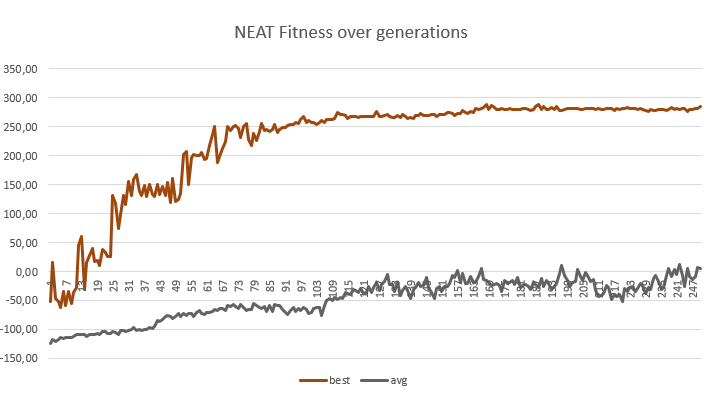

#echo State Network


in this section we define an echo state network



In [3]:
class EchoStateNetwork:
    def __init__(self, input_size, reservoir_size, output_size, connectivity=0.1, spectral_radius=0.9):
        self.input_size = input_size
        self.reservoir_size = reservoir_size
        self.output_size = output_size

        # Initialization
        self.reservoir_weights = np.random.rand(reservoir_size, reservoir_size) - 0.5
        self.reservoir_weights *= spectral_radius / np.max(np.abs(np.linalg.eigvals(self.reservoir_weights)))
        #print("reservoir weights: ",self.reservoir_weights.shape)

        # weights input-reservoir
        self.input_weights = np.random.rand(reservoir_size, input_size) - 0.5
        #print("input weights: ",self.input_weights.shape)

        # Inizializza i pesi tra il reservoir e l'output
        self.output_weights = np.random.rand(output_size, reservoir_size) - 0.5
        #print("output weights: ",self.output_weights.shape)


    def forward(self, input_data):
        # Esecuzione del reservoir
        reservoir_state = np.zeros(self.reservoir_size)
        for t in range(input_data.shape[0]):
            input_t = input_data
            parte1=np.dot(self.reservoir_weights, reservoir_state)
            reservoir_state = np.tanh(parte1 + np.dot(self.input_weights, input_t))


        # Calcolo dell'output
        output_data = np.dot(self.output_weights, reservoir_state)
        return output_data

#inputs from ESN and environment

CartPole-v1
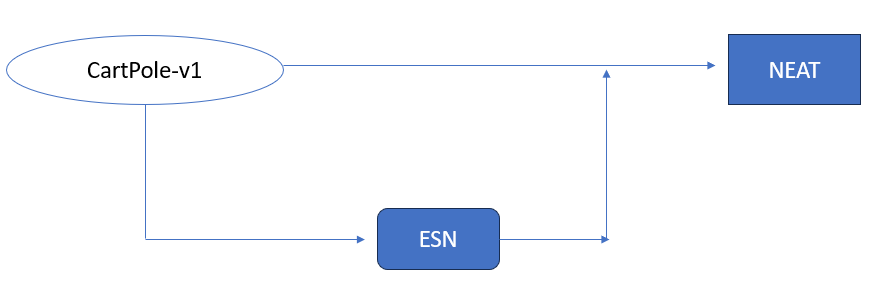

In [8]:
input_size=4
output_size=96
reservoir_size=10
esn= EchoStateNetwork(input_size, reservoir_size, output_size)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:

        net = neat.nn.FeedForwardNetwork.create(genome, config)
        total_reward= 0
        env = gym.make('CartPole-v1')
        observation = env.reset()
        observationEsn=esn.forward(observation)


        while True:


            obs=np.array([observation[0],observation[1],observation[2],observation[3],observationEsn[0],observationEsn[1],observationEsn[2],observationEsn[3],observationEsn[4],observationEsn[5],observationEsn[6],
                      observationEsn[7],
                      observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],
                      observationEsn[18],observationEsn[19],observationEsn[20],observationEsn[21],observationEsn[22],observationEsn[23],observationEsn[24],observationEsn[25],observationEsn[26],observationEsn[27],
                      observationEsn[28],observationEsn[29],observationEsn[30],observationEsn[31],observationEsn[32],observationEsn[33],observationEsn[34],observationEsn[35],observationEsn[36],observationEsn[37],
                      observationEsn[38],observationEsn[39],observationEsn[40],observationEsn[41],observationEsn[42],observationEsn[43],observationEsn[44],observationEsn[45],observationEsn[46],observationEsn[47],
                      observationEsn[48],observationEsn[49],observationEsn[50],observationEsn[51],observationEsn[52],observationEsn[53],observationEsn[54],observationEsn[55],observationEsn[56],observationEsn[57],
                      observationEsn[58],observationEsn[59],observationEsn[60],observationEsn[61],observationEsn[62],observationEsn[63],observationEsn[64],observationEsn[65],observationEsn[66],observationEsn[67],
                      observationEsn[68],observationEsn[69],observationEsn[70],observationEsn[71],observationEsn[72],observationEsn[73],observationEsn[74],observationEsn[75],observationEsn[76],observationEsn[77],
                      observationEsn[78],observationEsn[79],observationEsn[80],observationEsn[81],observationEsn[82],observationEsn[83],observationEsn[84],observationEsn[85],observationEsn[86],observationEsn[87],
                      observationEsn[88],observationEsn[89],observationEsn[90],observationEsn[91],observationEsn[92],observationEsn[93],observationEsn[94],observationEsn[95]])
            action = net.activate(obs)
            action = 0 if action[0] < 0.5 else 1
            observation, reward, done, _ = env.step(action)
            observationEsn=esn.forward(observation)

            total_reward += reward

            if done:
                break
        genome.fitness = total_reward

config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, 'config2')
population = neat.Population(config)

population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 250)
print("the winner is", winner)



 ****** Running generation 0 ****** 

Population's average fitness: 31.22800 stdev: 44.85925
Best fitness: 427.00000 - size: (1, 50) - species 1 - id 220
Average adjusted fitness: 0.051
Mean genetic distance 2.220, standard deviation 0.476
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   137    427.0    0.069     0
     2    0   113    187.0    0.033     0
Total extinctions: 0
Generation time: 1.200 sec

 ****** Running generation 1 ****** 

Population's average fitness: 89.01600 stdev: 93.61346
Best fitness: 500.00000 - size: (1, 50) - species 2 - id 258

Best individual in generation 1 meets fitness threshold - complexity: (1, 50)
the winner is Key: 258
Fitness: 500.0
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.0294542805101785, response=1.0, activation=clamped, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-100, 0), weight=-1.9207907965750295, enabled=True)
	DefaultConnectionGene(key=(

In [12]:
input_size=4
output_size=496
reservoir_size=10
esn= EchoStateNetwork(input_size, reservoir_size, output_size)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:

        net = neat.nn.FeedForwardNetwork.create(genome, config)
        total_reward= 0
        env = gym.make('CartPole-v1')
        observation = env.reset()
        observationEsn=esn.forward(observation)


        while True:


            obs=np.array([observation[0],observation[1],observation[2],observation[3],observationEsn[0],observationEsn[1],observationEsn[2],observationEsn[3],observationEsn[4],observationEsn[5],observationEsn[6],
                      observationEsn[7],
                      observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],
                      observationEsn[18],observationEsn[19],observationEsn[20],observationEsn[21],observationEsn[22],observationEsn[23],observationEsn[24],observationEsn[25],observationEsn[26],observationEsn[27],
                      observationEsn[28],observationEsn[29],observationEsn[30],observationEsn[31],observationEsn[32],observationEsn[33],observationEsn[34],observationEsn[35],observationEsn[36],observationEsn[37],
                      observationEsn[38],observationEsn[39],observationEsn[40],observationEsn[41],observationEsn[42],observationEsn[43],observationEsn[44],observationEsn[45],observationEsn[46],observationEsn[47],
                      observationEsn[48],observationEsn[49],observationEsn[50],observationEsn[51],observationEsn[52],observationEsn[53],observationEsn[54],observationEsn[55],observationEsn[56],observationEsn[57],
                      observationEsn[58],observationEsn[59],observationEsn[60],observationEsn[61],observationEsn[62],observationEsn[63],observationEsn[64],observationEsn[65],observationEsn[66],observationEsn[67],
                      observationEsn[68],observationEsn[69],observationEsn[70],observationEsn[71],observationEsn[72],observationEsn[73],observationEsn[74],observationEsn[75],observationEsn[76],observationEsn[77],
                      observationEsn[78],observationEsn[79],observationEsn[80],observationEsn[81],observationEsn[82],observationEsn[83],observationEsn[84],observationEsn[85],observationEsn[86],observationEsn[87],
                      observationEsn[88],observationEsn[89],observationEsn[90],observationEsn[91],observationEsn[92],observationEsn[93],observationEsn[94],observationEsn[95],
                      observationEsn[96],observationEsn[97],observationEsn[98],observationEsn[99],observationEsn[100],observationEsn[101],observationEsn[102],observationEsn[103],observationEsn[104],observationEsn[105],                     observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],
                      observationEsn[106],observationEsn[107],observationEsn[108],observationEsn[109],observationEsn[110],observationEsn[111],observationEsn[112],observationEsn[113],observationEsn[114],observationEsn[115],                      observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],
                      observationEsn[116],observationEsn[117],observationEsn[118],observationEsn[119],observationEsn[120],observationEsn[121],observationEsn[122],observationEsn[123],observationEsn[124],observationEsn[125],
                      observationEsn[126],observationEsn[127],observationEsn[128],observationEsn[129],observationEsn[130],observationEsn[131],observationEsn[132],observationEsn[133],observationEsn[134],observationEsn[135],
                      observationEsn[136],observationEsn[137],observationEsn[138],observationEsn[139],observationEsn[140],observationEsn[141],observationEsn[142],observationEsn[143],observationEsn[144],observationEsn[145],
                      observationEsn[146],observationEsn[147],observationEsn[148],observationEsn[149],observationEsn[150],observationEsn[151],observationEsn[152],observationEsn[153],observationEsn[154],observationEsn[155],
                      observationEsn[156],observationEsn[157],observationEsn[158],observationEsn[159],observationEsn[160],observationEsn[161],observationEsn[162],observationEsn[163],observationEsn[164],observationEsn[165],
                      observationEsn[166],observationEsn[167],observationEsn[168],observationEsn[169],observationEsn[170],observationEsn[171],observationEsn[172],observationEsn[173],observationEsn[174],observationEsn[175],
                      observationEsn[176],observationEsn[177],observationEsn[178],observationEsn[179],observationEsn[180],observationEsn[181],observationEsn[182],observationEsn[183],observationEsn[184],observationEsn[185],
                      observationEsn[186],observationEsn[187],observationEsn[188],observationEsn[189],observationEsn[190],observationEsn[191],observationEsn[192],observationEsn[193],observationEsn[194],observationEsn[195],
                      observationEsn[196],observationEsn[197],observationEsn[198],observationEsn[199],observationEsn[200],observationEsn[201],observationEsn[202],observationEsn[203],observationEsn[204],observationEsn[205],
                      observationEsn[206],observationEsn[207],observationEsn[208],observationEsn[209],observationEsn[210],observationEsn[211],observationEsn[212],observationEsn[213],observationEsn[214],observationEsn[215],                      observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],
                      observationEsn[216],observationEsn[217],observationEsn[218],observationEsn[219],observationEsn[220],observationEsn[221],observationEsn[222],observationEsn[223],observationEsn[224],observationEsn[225],
                      observationEsn[226],observationEsn[227],observationEsn[228],observationEsn[229],observationEsn[230],observationEsn[231],observationEsn[232],observationEsn[233],observationEsn[234],observationEsn[235],
                      observationEsn[236],observationEsn[237],observationEsn[238],observationEsn[239],observationEsn[240],observationEsn[241],observationEsn[242],observationEsn[243],observationEsn[244],observationEsn[245],
                      observationEsn[246],observationEsn[247],observationEsn[248],observationEsn[249],observationEsn[250],observationEsn[251],observationEsn[252],observationEsn[253],observationEsn[254],observationEsn[255],
                      observationEsn[256],observationEsn[257],observationEsn[258],observationEsn[259],observationEsn[260],observationEsn[261],observationEsn[262],observationEsn[263],observationEsn[264],observationEsn[265],
                      observationEsn[266],observationEsn[267],observationEsn[268],observationEsn[269],observationEsn[270],observationEsn[271],observationEsn[272],observationEsn[273],observationEsn[274],observationEsn[275],
                      observationEsn[276],observationEsn[277],observationEsn[278],observationEsn[279],observationEsn[280],observationEsn[281],observationEsn[282],observationEsn[283],observationEsn[284],observationEsn[285],
                      observationEsn[286],observationEsn[287],observationEsn[288],observationEsn[289],observationEsn[290],observationEsn[291],observationEsn[292],observationEsn[293],observationEsn[294],observationEsn[295],
                      observationEsn[296],observationEsn[297],observationEsn[298],observationEsn[299],observationEsn[300],observationEsn[301],observationEsn[302],observationEsn[303],observationEsn[304],observationEsn[305],
                      observationEsn[306],observationEsn[307],observationEsn[308],observationEsn[309],observationEsn[310],observationEsn[311],observationEsn[312],observationEsn[313],observationEsn[314],observationEsn[315],                      observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],
                      observationEsn[316],observationEsn[317],observationEsn[318],observationEsn[319],observationEsn[320],observationEsn[321],observationEsn[322],observationEsn[323],observationEsn[324],observationEsn[325],
                      observationEsn[326],observationEsn[327],observationEsn[328],observationEsn[329],observationEsn[330],observationEsn[331],observationEsn[332],observationEsn[333],observationEsn[334],observationEsn[335],
                      observationEsn[336],observationEsn[337],observationEsn[338],observationEsn[339],observationEsn[340],observationEsn[341],observationEsn[342],observationEsn[343],observationEsn[344],observationEsn[345],
                      observationEsn[346],observationEsn[347],observationEsn[348],observationEsn[349],observationEsn[350],observationEsn[351],observationEsn[352],observationEsn[353],observationEsn[354],observationEsn[355],
                      observationEsn[356],observationEsn[357],observationEsn[358],observationEsn[359],observationEsn[360],observationEsn[361],observationEsn[362],observationEsn[363],observationEsn[364],observationEsn[365],
                      observationEsn[366],observationEsn[367],observationEsn[368],observationEsn[369],observationEsn[370],observationEsn[371],observationEsn[372],observationEsn[373],observationEsn[374],observationEsn[375],
                      observationEsn[376],observationEsn[377],observationEsn[378],observationEsn[379],observationEsn[380],observationEsn[381],observationEsn[382],observationEsn[383],observationEsn[384],observationEsn[385],
                      observationEsn[386],observationEsn[387],observationEsn[388],observationEsn[389],observationEsn[390],observationEsn[391],observationEsn[392],observationEsn[393],observationEsn[394],observationEsn[395],
                      observationEsn[396],observationEsn[397],observationEsn[398],observationEsn[399],observationEsn[400],observationEsn[401],observationEsn[402],observationEsn[403],observationEsn[404],observationEsn[405],
                      observationEsn[406],observationEsn[407],observationEsn[408],observationEsn[409],observationEsn[410],observationEsn[411],observationEsn[412],observationEsn[413],observationEsn[414],observationEsn[415],                      observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],
                      observationEsn[416],observationEsn[417],observationEsn[418],observationEsn[419],observationEsn[420],observationEsn[421],observationEsn[422],observationEsn[423],observationEsn[424],observationEsn[425],
                      observationEsn[476],observationEsn[477],observationEsn[478],observationEsn[479],observationEsn[480],observationEsn[481],observationEsn[482],observationEsn[483],observationEsn[484],observationEsn[485],
                      observationEsn[486],observationEsn[487],observationEsn[488],observationEsn[489],observationEsn[490],observationEsn[491],observationEsn[492],observationEsn[493],observationEsn[494],observationEsn[495]])
            action = net.activate(obs)
            action = 0 if action[0] < 0.5 else 1
            observation, reward, done, _ = env.step(action)
            observationEsn=esn.forward(observation)

            total_reward += reward

            if done:
                break
        genome.fitness = total_reward

config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, 'config3')
population = neat.Population(config)

population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 250)
#print("the winner is", winner)



 ****** Running generation 0 ****** 

Population's average fitness: 43.85600 stdev: 64.20744
Best fitness: 500.00000 - size: (1, 500) - species 2 - id 72

Best individual in generation 0 meets fitness threshold - complexity: (1, 500)


BipedalWalker-v3
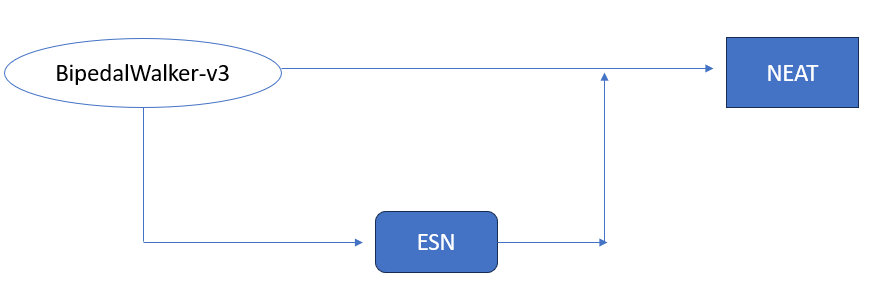

In [4]:
input_size=24
output_size=76
reservoir_size=10
esn= EchoStateNetwork(input_size, reservoir_size, output_size)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:

        net = neat.nn.FeedForwardNetwork.create(genome, config)
        total_reward= 0
        env = gym.make('BipedalWalker-v3')
        observation = env.reset()
        observationEsn=esn.forward(observation)

        while True:
            obs=np.array([observation[0],observation[1],observation[2],observation[3],observation[4], observation[5],observation[6],observation[7],observation[8],observation[9],observation[10],observation[11],
                      observation[12],observation[13],observation[14],observation[15], observation[16], observation[17],observation[18], observation[19], observation[20],observation[21],observation[22], observation[23],
                      observationEsn[0], observationEsn[1], observationEsn[2], observationEsn[3],observationEsn[4],observationEsn[5],observationEsn[6],observationEsn[7],observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],
                      observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],observationEsn[18],observationEsn[19],observationEsn[20],observationEsn[21],observationEsn[22],observationEsn[23],
                      observationEsn[24],observationEsn[25],observationEsn[26],observationEsn[27],
                      observationEsn[28],observationEsn[29],observationEsn[30],observationEsn[31],observationEsn[32],observationEsn[33],observationEsn[34],observationEsn[35],observationEsn[36],observationEsn[37],
                      observationEsn[38],observationEsn[39],observationEsn[40],observationEsn[41],observationEsn[42],observationEsn[43],observationEsn[44],observationEsn[45],observationEsn[46],observationEsn[47],
                      observationEsn[48],observationEsn[49],observationEsn[50],observationEsn[51],observationEsn[52],observationEsn[53],observationEsn[54],observationEsn[55],observationEsn[56],observationEsn[57],
                      observationEsn[58],observationEsn[59],observationEsn[60],observationEsn[61],observationEsn[62],observationEsn[63],observationEsn[64],observationEsn[65],observationEsn[66],observationEsn[67],
                      observationEsn[68],observationEsn[69],observationEsn[70],observationEsn[71],observationEsn[72],observationEsn[73],observationEsn[74],observationEsn[75]])
            action = net.activate(obs)
            observation, reward, done, _ = env.step(action)
            observationEsn=esn.forward(observation)

            total_reward += reward

            if done:
                break
        genome.fitness = total_reward




config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, 'configW2')
population = neat.Population(config)

population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 250)
print("the winner is", winner)

/usr/local/lib/python3.10/dist-packages/neat/config.py:175: DeprecationWarning: Using default False for 'no_fitness_termination'
  warnings.warn("Using default {!r} for '{!s}'".format(p.default, p.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'false' for 'single_structural_mutation'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'default' for 'structural_mutation_surer'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'bias_init_type'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'response_init_type'
  warnings.warn("Using default


 ****** Running generation 0 ****** 



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Population's average fitness: -126.10939 stdev: 24.44928
Best fitness: -99.74839 - size: (4, 200) - species 1 - id 46
Average adjusted fitness: 0.713
Mean genetic distance 2.284, standard deviation 0.353
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   122    -99.7    0.744     0
     2    0   128   -101.8    0.682     0
Total extinctions: 0
Generation time: 85.738 sec

 ****** Running generation 1 ****** 

Population's average fitness: -117.64306 stdev: 20.77633
Best fitness: -94.17501 - size: (4, 200) - species 2 - id 294
Average adjusted fitness: 0.747
Mean genetic distance 2.262, standard deviation 0.352
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    95    -99.5    0.733     0
     2    1   155    -94.2    0.761     0
Total extinctions: 0
Generation time: 53.169 sec (69.453 average)

 ****** Running gene

KeyboardInterrupt: ignored


# inputs from ESN

CartPole-v1

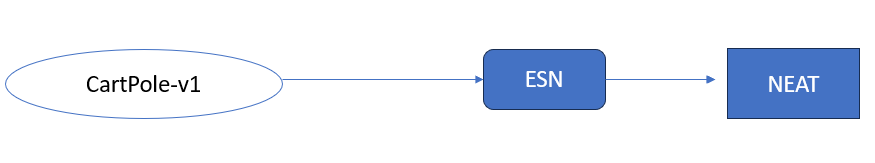

In [20]:
input_size=4
output_size=100
reservoir_size=20
esn= EchoStateNetwork(input_size, reservoir_size, output_size)

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config3)
        total_reward= 0
        env = gym.make('CartPole-v1')
        observation = env.reset()
        observationEsn=esn.forward(observation)

        while True:
            action = net.activate(observationEsn)
            action = 0 if action[0] < 0.5 else 1
            observation, reward, done, _ = env.step(action)
            observationEsn=esn.forward(observation)
            total_reward += reward

            if done:
                break
        genome.fitness = total_reward




config3 = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, 'config3')
population = neat.Population(config3)

population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 250)
#print("the winner is", winner)



 ****** Running generation 0 ****** 

Population's average fitness: 32.37600 stdev: 50.55985
Best fitness: 500.00000 - size: (1, 100) - species 1 - id 165

Best individual in generation 0 meets fitness threshold - complexity: (1, 100)


BipedalWalker-v3

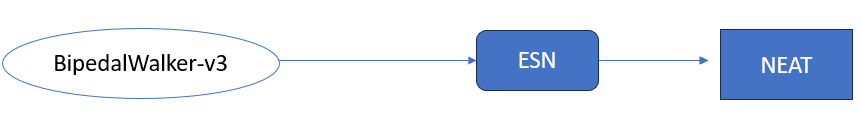

In [14]:
input_size=24
output_size=100
reservoir_size=30
esn= EchoStateNetwork(input_size, reservoir_size, output_size)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:

        net = neat.nn.FeedForwardNetwork.create(genome, config)
        total_reward= 0
        env = gym.make('BipedalWalker-v3')
        observation = env.reset()
        observationEsn=esn.forward(observation)

        while True:
            action = net.activate(observationEsn)
            observation, reward, done, _ = env.step(action)
            observationEsn=esn.forward(observation)
            total_reward += reward

            if done:
                break
        genome.fitness = total_reward


config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, 'configW2')
population = neat.Population(config)

population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 250)
print("the winner is", winner)



 ****** Running generation 0 ****** 

Population's average fitness: -128.40695 stdev: 24.48800
Best fitness: -100.99637 - size: (4, 200) - species 1 - id 1
Average adjusted fitness: 0.735
Mean genetic distance 2.097, standard deviation 0.369
Population of 250 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   250   -101.0    0.735     0
Total extinctions: 0
Generation time: 88.404 sec

 ****** Running generation 1 ****** 

Population's average fitness: -119.58267 stdev: 24.08045
Best fitness: -22.46428 - size: (4, 199) - species 1 - id 423
Average adjusted fitness: 0.406
Mean genetic distance 2.021, standard deviation 0.450
Population of 250 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   250    -22.5    0.406     0
Total extinctions: 0
Generation time: 67.079 sec (77.742 average)

 ****** Running generation 2 ****** 



KeyboardInterrupt: ignored

# Addition of random inputs

#50 inputs

In [ ]:
import random
runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          obs = env.reset()

          total_reward = 0

          while True:
            observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]

            action = net.activate(observation)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            obs, reward, done, _ = env.step(action)

            total_reward += reward


            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)

config_path = "configRand"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=500)

#simulate the winner
env = gym.make("CartPole-v1")
obs= env.reset()
net= neat.nn.FeedForwardNetwork.create(winner, config)

fitness=0

while True:
  #env.render()
  observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]

  action =net.activate(observation)
  action = 0 if action[0] < 0.5 else 1
  obs, reward, done, _ = env.step(action)

  fitness += reward
  screen = env.render(mode='rgb_array')
  if done:
        break

print("the fitness is", fitness)



 ****** Running generation 0 ****** 

Population's average fitness: 9.36000 stdev: 0.72000
Best fitness: 11.00000 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.470
Mean genetic distance 1.722, standard deviation 0.743
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   144     11.0    0.443     0
     2    0   106     11.0    0.496     0
Total extinctions: 0
Generation time: 0.354 sec

 ****** Running generation 1 ****** 

Population's average fitness: 10.06800 stdev: 3.55969
Best fitness: 45.00000 - size: (1, 1) - species 1 - id 374
Average adjusted fitness: 0.056
Mean genetic distance 2.069, standard deviation 0.766
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150     45.0    0.055     0
     2    1   100     35.0    0.057     0
Total extinctions: 0
Generation time: 0.376 sec (0.365 average)

In [ ]:
input_size=50
output_size=10
reservoir_size=4
esn= EchoStateNetwork(input_size, reservoir_size, output_size)

runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          obs = env.reset()

          total_reward = 0

          while True:
            observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]
            esn_observation=esn.forward(observation)
            action = net.activate(esn_observation)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            obs, reward, done, _ = env.step(action)

            total_reward += reward


            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)

config_path = "config3"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=500)

#simulate the winner
env = gym.make("CartPole-v1")
obs= env.reset()
net= neat.nn.FeedForwardNetwork.create(winner, config)

fitness=0

while True:
  #env.render()
  observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]
  esn_observation=esn.forward(observation)
  action =net.activate(esn_observation)
  action = 0 if action[0] < 0.5 else 1
  obs, reward, done, _ = env.step(action)

  fitness += reward
  screen = env.render(mode='rgb_array')
  if done:
        break

print("the fitness is", fitness)


Streaming output truncated to the last 5000 lines.

 ****** Running generation 143 ****** 

Population's average fitness: 29.17339 stdev: 18.74011
Best fitness: 127.00000 - size: (2, 6) - species 28 - id 31400
Average adjusted fitness: 0.164
Mean genetic distance 3.177, standard deviation 0.804
Population of 248 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   36    24     75.0    0.172     7
    24   26    22    108.0    0.194     2
    25   24    34     81.0    0.198    16
    26   24    46     66.0    0.172    13
    27   15    20     55.0    0.120     7
    28   15    44    127.0    0.258     1
    29    6    23     77.0    0.178     3
    30    2    23     48.0    0.067     1
    31    1    12     46.0    0.119     0
Total extinctions: 0
Generation time: 5.420 sec (6.391 average)

 ****** Running generation 144 ****** 

Population's average fitness: 31.36290 stdev: 17.53261
Best fitness: 98.00000 - size: (3, 9) - sp

KeyboardInterrupt: ignored

#100 input

In [ ]:
import random
runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          obs = env.reset()
          total_reward = 0

          while True:
            observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]

            action = net.activate(observation)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            obs, reward, done, _ = env.step(action)

            total_reward += reward


            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)

config_path = "configRand"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=250)

#simulate the winner
env = gym.make("CartPole-v1")
obs= env.reset()
net= neat.nn.FeedForwardNetwork.create(winner, config)

fitness=0

while True:
  observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]
  action =net.activate(observation)
  action = 0 if action[0] < 0.5 else 1
  obs, reward, done, _ = env.step(action)

  fitness += reward
  screen = env.render(mode='rgb_array')
  if done:
        break

print("the fitness is", fitness)


 ****** Running generation 0 ****** 

Population's average fitness: 9.27200 stdev: 0.74163
Best fitness: 11.00000 - size: (1, 0) - species 1 - id 46
Average adjusted fitness: 0.423
Mean genetic distance 1.895, standard deviation 0.867
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   142     11.0    0.420     0
     2    0   108     11.0    0.427     0
Total extinctions: 0
Generation time: 0.373 sec

 ****** Running generation 1 ****** 

Population's average fitness: 9.67600 stdev: 1.67422
Best fitness: 22.00000 - size: (1, 1) - species 2 - id 376
Average adjusted fitness: 0.121
Mean genetic distance 2.203, standard deviation 0.914
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   126     18.0    0.109     0
     2    1   124     22.0    0.134     0
Total extinctions: 0
Generation time: 0.388 sec (0.381 average)

In [ ]:
import random
runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("BipedalWalker-v3")
          obs = env.reset()
          total_reward = 0

          while True:
            observation=[obs[0], obs[1], obs[2], obs[3], obs[4], obs[5],obs[6], obs[7], obs[8], obs[9],
                       obs[10], obs[11], obs[12], obs[13],obs[14], obs[15], obs[16],obs[17],obs[18],obs[19],
                       obs[20], obs[21], obs[22], obs[23],random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]

            action = net.activate(observation)
            obs, reward, done, _ = env.step(action)

            total_reward += reward


            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)

config_path = "configRandW"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=250)

#simulate the winner
env = gym.make("BipedalWalker-v3")
obs= env.reset()
net= neat.nn.FeedForwardNetwork.create(winner, config)

fitness=0

while True:
  observation=[obs[0], obs[1], obs[2], obs[3], obs[4], obs[5],obs[6], obs[7], obs[8], obs[9],
                       obs[10], obs[11], obs[12], obs[13],obs[14], obs[15], obs[16],obs[17],obs[18],obs[19],
                       obs[20], obs[21], obs[22], obs[23],random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]
  action =net.activate(observation)
  obs, reward, done, _ = env.step(action)

  fitness += reward
  screen = env.render(mode='rgb_array')
  if done:
        break

print("the fitness is", fitness)

/usr/local/lib/python3.10/dist-packages/neat/config.py:175: DeprecationWarning: Using default False for 'no_fitness_termination'
  warnings.warn("Using default {!r} for '{!s}'".format(p.default, p.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'false' for 'single_structural_mutation'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'default' for 'structural_mutation_surer'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'bias_init_type'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'response_init_type'
  warnings.warn("Using default


 ****** Running generation 0 ****** 



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Population's average fitness: -132.20116 stdev: 37.20885
Best fitness: -98.91273 - size: (4, 200) - species 1 - id 89
Average adjusted fitness: 0.821
Mean genetic distance 2.187, standard deviation 0.524
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   241    -98.9    0.821     0
     2    0     9       --       --     0
Total extinctions: 0
Generation time: 77.196 sec

 ****** Running generation 1 ****** 

Population's average fitness: -123.38736 stdev: 25.67123
Best fitness: -96.68130 - size: (4, 200) - species 1 - id 89
Average adjusted fitness: 0.860
Mean genetic distance 2.285, standard deviation 0.663
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   177    -96.7    0.840     0
     2    1    73   -102.5    0.881     0
Total extinctions: 0
Generation time: 60.088 sec (68.642 average)

 ****** Running gener

#500 input

In [ ]:
import random
runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, enome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          obs = env.reset()
          total_reward = 0

          while True:
            observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]

            action = net.activate(observation)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            obs, reward, done, _ = env.step(action)

            total_reward += reward


            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)

config_path = "configRand500"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=500)

#simulate the winner
env = gym.make("CartPole-v1")
obs= env.reset()
net= neat.nn.FeedForwardNetwork.create(winner, config)

fitness=0

while True:
  #env.render()
  observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]
  action =net.activate(observation)
  action = 0 if action[0] < 0.5 else 1
  obs, reward, done, _ = env.step(action)

  fitness += reward
  screen = env.render(mode='rgb_array')
  if done:
        break

print("the fitness is", fitness)


 ****** Running generation 0 ****** 

Population's average fitness: 22.03200 stdev: 12.14969
Best fitness: 91.00000 - size: (1, 250) - species 2 - id 163
Average adjusted fitness: 0.188
Mean genetic distance 2.207, standard deviation 0.439
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   139     64.0    0.160     0
     2    0   111     91.0    0.216     0
Total extinctions: 0
Generation time: 2.762 sec

 ****** Running generation 1 ****** 

Population's average fitness: 21.98000 stdev: 12.86808
Best fitness: 94.00000 - size: (1, 249) - species 1 - id 306
Average adjusted fitness: 0.161
Mean genetic distance 2.200, standard deviation 0.499
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   144     94.0    0.174     0
     2    1   106     66.0    0.148     1
Total extinctions: 0
Generation time: 2.730 sec (2.746

KeyboardInterrupt: ignored

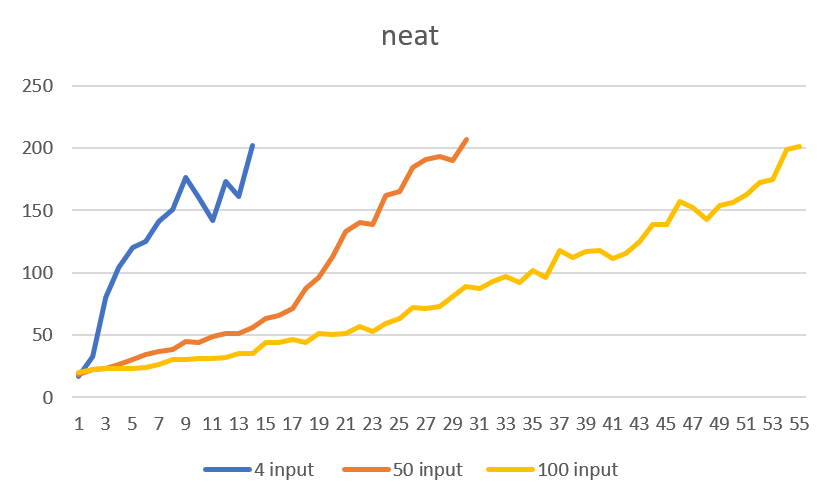
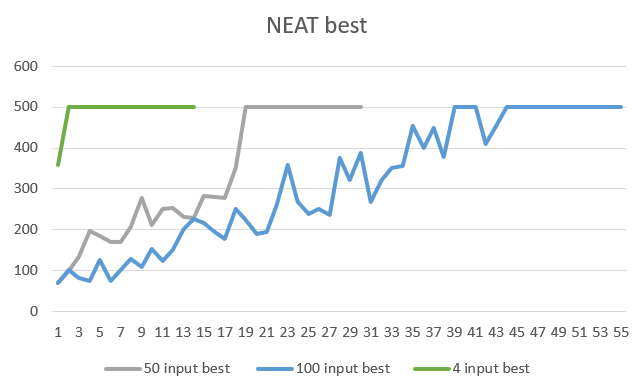

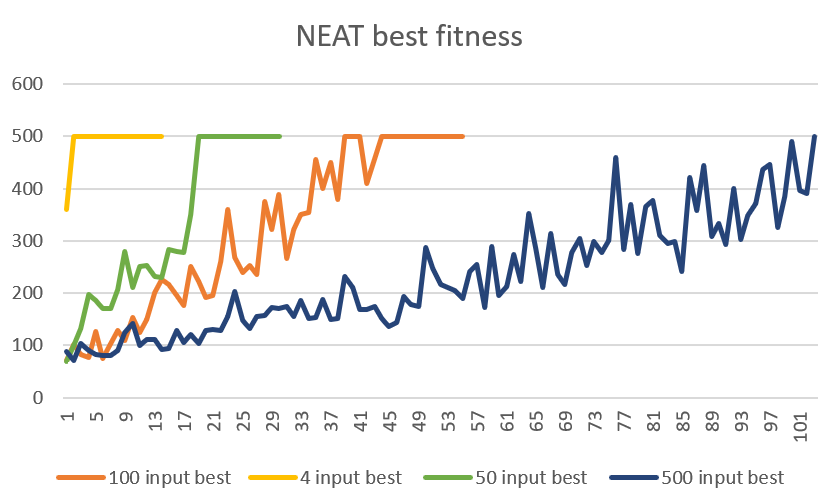

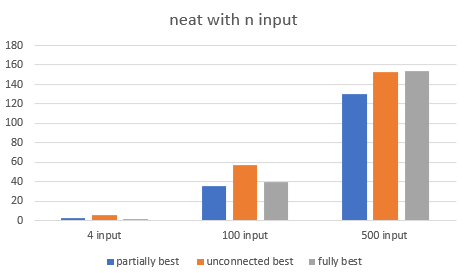

In [ ]:
import random
class EchoStateNetwork:
    def __init__(self, input_size, reservoir_size, output_size, connectivity=0.1, spectral_radius=0.9):
        # ESN
        self.input_size = input_size
        self.reservoir_size = reservoir_size
        self.output_size = output_size

        # Initialization
        self.reservoir_weights = np.random.rand(reservoir_size, reservoir_size) - 0.5
        self.reservoir_weights *= spectral_radius / np.max(np.abs(np.linalg.eigvals(self.reservoir_weights)))
        #print("reservoir weights: ",self.reservoir_weights.shape)

        # weights input-reservoir
        self.input_weights = np.random.rand(reservoir_size, input_size) - 0.5
        #print("input weights: ",self.input_weights.shape)

        # Inizializza i pesi tra il reservoir e l'output
        self.output_weights = np.random.rand(output_size, reservoir_size) - 0.5
        #print("output weights: ",self.output_weights.shape)


    def forward(self, input_data):
        # Esecuzione del reservoir
        reservoir_state = np.zeros(self.reservoir_size)
        #print("reservoir state:", reservoir_state.shape)
        #print("input data:",input_data.shape)
        for t in range(len(input_data)):
            input_t = input_data
            #print("reservoir state:", reservoir_state.shape)
            #print("input weights: ",self.input_weights.shape)
            #print("input t: ",input_t)

            #print("parte uno",np.dot(self.reservoir_weights, reservoir_state).shape)
            #print("parte due",np.dot(self.input_weights, input_t).shape)
            parte1=np.dot(self.reservoir_weights, reservoir_state)

            reservoir_state = np.tanh(parte1 + np.dot(self.input_weights, input_t))


        # Calcolo dell'output
        output_data = np.dot(self.output_weights, reservoir_state)
        return output_data


input_size=100
output_size=20
reservoir_size=70
esn= EchoStateNetwork(input_size, reservoir_size, output_size)

runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          obs = env.reset()
          #print(obs)
          #print(obs.shape)
          total_reward = 0

          while True:
            observation=[obs[0], obs[1], obs[2], obs[3], random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),
                       random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)]
            #print(observation)
            observationESN= esn.forward(observation)
            action = net.activate(observationESN)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            obs, reward, done, _ = env.step(action)

            total_reward += reward


            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)

config_path = "configRESN"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=250)

/usr/local/lib/python3.10/dist-packages/neat/config.py:175: DeprecationWarning: Using default False for 'no_fitness_termination'
  warnings.warn("Using default {!r} for '{!s}'".format(p.default, p.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'false' for 'single_structural_mutation'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'default' for 'structural_mutation_surer'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'bias_init_type'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'response_init_type'
  warnings.warn("Using default


 ****** Running generation 0 ****** 

Population's average fitness: 20.85600 stdev: 11.48822
Best fitness: 67.00000 - size: (1, 10) - species 1 - id 128
Average adjusted fitness: 0.161
Mean genetic distance 2.624, standard deviation 0.851
Population of 250 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   162     67.0    0.213     0
     2    0    34     21.0    0.116     0
     3    0    54     62.0    0.155     0
Total extinctions: 0
Generation time: 14.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 22.27200 stdev: 13.90187
Best fitness: 101.00000 - size: (1, 10) - species 1 - id 347
Average adjusted fitness: 0.146
Mean genetic distance 2.529, standard deviation 0.869
Population of 251 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   120    101.0    0.153     0
     2    1    43     37.0    0.086     0
     3    1 

In [ ]:
input_size=100
output_size=20
reservoir_size=70
esn= EchoStateNetwork(input_size, reservoir_size, output_size)
esn1=EchoStateNetwork()

runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          obs = env.reset()
          observationESN= esn1.forward(observation)

          #print(obs)
          #print(obs.shape)
          total_reward = 0

          while True:
            observation=np.array([observation[0],observation[1],observation[2],observation[3],observationEsn[0],observationEsn[1],observationEsn[2],observationEsn[3],observationEsn[4],observationEsn[5],observationEsn[6],
                      observationEsn[7],
                      observationEsn[8],observationEsn[9],observationEsn[10],observationEsn[11],observationEsn[12],observationEsn[13],observationEsn[14],observationEsn[15],observationEsn[16],observationEsn[17],
                      observationEsn[18],observationEsn[19],observationEsn[20],observationEsn[21],observationEsn[22],observationEsn[23],observationEsn[24],observationEsn[25],observationEsn[26],observationEsn[27],
                      observationEsn[28],observationEsn[29],observationEsn[30],observationEsn[31],observationEsn[32],observationEsn[33],observationEsn[34],observationEsn[35],observationEsn[36],observationEsn[37],
                      observationEsn[38],observationEsn[39],observationEsn[40],observationEsn[41],observationEsn[42],observationEsn[43],observationEsn[44],observationEsn[45],observationEsn[46],observationEsn[47],
                      observationEsn[48],observationEsn[49],observationEsn[50],observationEsn[51],observationEsn[52],observationEsn[53],observationEsn[54],observationEsn[55],observationEsn[56],observationEsn[57],
                      observationEsn[58],observationEsn[59],observationEsn[60],observationEsn[61],observationEsn[62],observationEsn[63],observationEsn[64],observationEsn[65],observationEsn[66],observationEsn[67],
                      observationEsn[68],observationEsn[69],observationEsn[70],observationEsn[71],observationEsn[72],observationEsn[73],observationEsn[74],observationEsn[75],observationEsn[76],observationEsn[77],
                      observationEsn[78],observationEsn[79],observationEsn[80],observationEsn[81],observationEsn[82],observationEsn[83],observationEsn[84],observationEsn[85],observationEsn[86],observationEsn[87],
                      observationEsn[88],observationEsn[89],observationEsn[90],observationEsn[91],observationEsn[92],observationEsn[93],observationEsn[94],observationEsn[95]])
            #print(observation)
            observationESNfinal= esn.forward(observation)
            action = net.activate(observationESNfinal)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            obs, reward, done, _ = env.step(action)

            total_reward += reward


            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)

config_path = "configRESN"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

winner = p.run(eval_genomes, n=250)

#removing velocity
not included in the report, this was just an experiment of trying to use NEAT and ESNs to solve CartPole without any input information about velocities.

In [ ]:
runs_per_net = 1
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          obs= env.reset()
          total_reward = 0

          while True:
            observation=[obs[0], obs[2]]
            action = net.activate(observation)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            obs, reward, done, _ = env.step(action)
            total_reward += reward

            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)
config_path = "configMinusVelocity"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)


p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
winner = p.run(eval_genomes, n=10000)



env = gym.make("CartPole-v1")
obs = env.reset()
net= neat.nn.FeedForwardNetwork.create(winner, config)

fitness=0


while True:
  #env.render()
  observation=[obs[0],obs[2]]
  action =net.activate(observation)
  action = 0 if action[0] < 0.5 else 1
  obs, reward, done, _ = env.step(action)

  fitness += reward
  screen = env.render(mode='rgb_array')
  if done:
        break

print("the fitness is", fitness)
print("the winner is ", winner)

/usr/local/lib/python3.10/dist-packages/neat/config.py:175: DeprecationWarning: Using default False for 'no_fitness_termination'
  warnings.warn("Using default {!r} for '{!s}'".format(p.default, p.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'false' for 'single_structural_mutation'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'default' for 'structural_mutation_surer'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'bias_init_type'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'response_init_type'
  warnings.warn("Using default

Streaming output truncated to the last 5000 lines.
  1965   20    64     66.0    0.468     9
Total extinctions: 5
Generation time: 0.679 sec (0.881 average)

 ****** Running generation 9682 ****** 

Population's average fitness: 37.61446 stdev: 12.95172
Best fitness: 66.00000 - size: (50, 55) - species 1963 - id 2076651

Species 1962 with 64 members is stagnated: removing it
Average adjusted fitness: 0.506
Mean genetic distance 2.844, standard deviation 0.600
Population of 250 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
  1963   28    70     66.0    0.497    15
  1964   22    82     62.0    0.502     3
  1965   21    86     58.0    0.519    10
  1966    0    12       --       --     0
Total extinctions: 5
Generation time: 1.601 sec (0.947 average)

 ****** Running generation 9683 ****** 

Population's average fitness: 37.40400 stdev: 13.82869
Best fitness: 67.00000 - size: (47, 50) - species 1963 - id 2076952
Average adjuste

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [ ]:
input_size=2
output_size=5
reservoir_size=2
esn= EchoStateNetwork(input_size, reservoir_size, output_size)
runs_per_net = 1

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitnesses = []

        for runs in range(runs_per_net):
          env = gym.make("CartPole-v1")
          obs= env.reset()
          o=[obs[0],obs[2]]
          obsESN=esn.forward(o)
          total_reward = 0

          while True:
            observation=[obs[0], obs[2],obsESN[0], obsESN[1],obsESN[2],obsESN[3],obsESN[4]]
            action = net.activate(observation)
            #print("l'azione è",action)
            action = 0 if action[0] < 0.5 else 1
            obs, reward, done, _ = env.step(action)
            o=[obs[0],obs[2]]
            obsESN=esn.forward(o)
            total_reward += reward

            if done:
                break
          fitnesses.append(total_reward)

        genome.fitness = np.mean(fitnesses)
config_path = "configMinusVelocityESN"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)


p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
winner = p.run(eval_genomes, n=10000)



env = gym.make("CartPole-v1")
obs = env.reset()
o=[obs[0],obs[2]]
net= neat.nn.FeedForwardNetwork.create(winner, config)
obsESN=esn.forwar(o)
fitness=0


while True:
  #env.render()
  observation=[obs[0], obs[2],obsESN[0], obsESN[1],obsESN[2],obsESN[3],obsESN[4]]
  action =net.activate(observation)
  action = 0 if action[0] < 0.5 else 1
  obs, reward, done, _ = env.step(action)
  o=[obs[0],obs[2]]
  obsESN=esn.forward(o)

  fitness += reward
  screen = env.render(mode='rgb_array')
  if done:
        break

print("the fitness is", fitness)
print("the winner is ", winner)

/usr/local/lib/python3.10/dist-packages/neat/config.py:175: DeprecationWarning: Using default False for 'no_fitness_termination'
  warnings.warn("Using default {!r} for '{!s}'".format(p.default, p.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'false' for 'single_structural_mutation'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'default' for 'structural_mutation_surer'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'bias_init_type'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.10/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'response_init_type'
  warnings.warn("Using default

Streaming output truncated to the last 5000 lines.
  1303   29    59     58.0    0.523    16
  1304   24    33     55.0    0.494     6
  1305   19    58     55.0    0.547    14
  1306   14    56     63.0    0.542     2
  1307    1    15     47.0    0.178     0
  1308    0    28       --       --     0
Total extinctions: 3
Generation time: 0.847 sec (0.901 average)

 ****** Running generation 6707 ****** 

Population's average fitness: 36.51406 stdev: 14.58918
Best fitness: 68.00000 - size: (41, 28) - species 1306 - id 1446036
Average adjusted fitness: 0.447
Mean genetic distance 3.108, standard deviation 0.550
Population of 248 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
  1303   30    52     63.0    0.490    17
  1304   25    36     56.0    0.445     7
  1305   20    50     65.0    0.462    15
  1306   15    32     68.0    0.542     3
  1307    2    40     54.0    0.252     0
  1308    1    38     65.0    0.494     0
Total 

KeyboardInterrupt: ignored